<a href="https://colab.research.google.com/github/haiyankong/psyc888/blob/main/neuroimaging_data_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuroimaging data as a matrix

In this Jupyter Notebook we demonstrate how to access neuroimaging data with the `neuroboros` package, and what the data looks like.

In [19]:
%%capture
%pip install -U neuroboros hyperalignment

In [20]:
import numpy as np
import neuroboros as nb
import matplotlib.pyplot as plt

Datasets can be accessed using the name of the dataset. For example, `nb.Forrest` is the [3 T data](https://doi.org/10.1038/sdata.2016.92) of the [StudyForrest](https://www.studyforrest.org) dataset.

For most of the datasets, `dset.subjects` is a list of subject IDs.

In [21]:
dset = nb.Forrest()
sids = dset.subjects
type(sids), len(sids)

(list, 15)

In [22]:
sids[:3]

['01', '02', '03']

`dset.get_data` is the method used to load the data files and preprocess them. Four positional parameters are mandatery, that is, `sid` (subject ID), `task` (name of the task), `run` (run number, starting from 1), and `lr` ('l' for left hemisphere, 'r' for right, 'lr' for both).

In [23]:
sid = sids[0]
dm = dset.get_data(sid, 'forrest', 1, 'l')

The data is stored in a 2-D NumPy array, usually referred to as a data matrix.
The first dimension is the time points, and the second dimension is the vertices.
This data matrix is the responses of the left hemisphere to first run of the movie, and it has 451 time points and 9675 vertices.

Sometimes the first dimension can be stimuli, and the second dimension can be voxels or components. These two dimensions are often referred to as samples and features in machine learning contexts.

In [24]:
type(dm), dm.dtype

(numpy.ndarray, dtype('float64'))

In [25]:
dm.shape

(451, 9675)

Each column of the data matrix is the response time series of a cortical vertex.

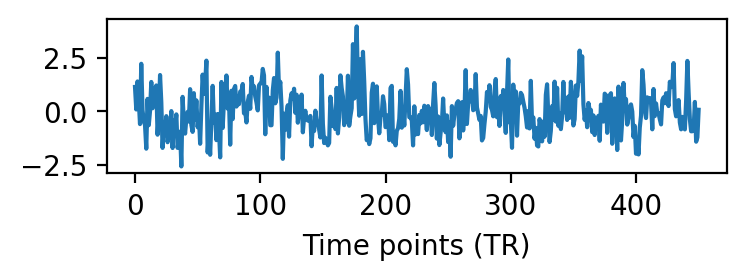

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(4, 1), dpi=200)
ax.plot(dm[:, 0])
ax.set_xlabel('Time points (TR)')
plt.show()

Each row of the data matrix is the spatial response pattern at a certain time point of the movie.

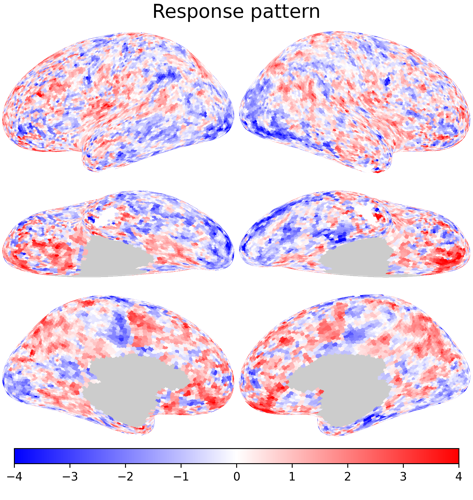

In [27]:
nb.plot([dm[0],
    dset.get_data(sid, 'forrest', 1, 'r')[0]],
    cmap='bwr',
    vmax=4,
    vmin=-4,
    title='Response pattern')

When we want to analyze a certain brain region, we can create a smaller data matrix using the indices of vertices in the region.

For example, `nb.sls` returns the vertex indices of each searchlight as a NumPy array.

In [28]:
sls = nb.sls('l', radius=20)
type(sls), len(sls)

(list, 9675)

In [29]:
type(sls[0]), len(sls[0])

(numpy.ndarray, 119)

`sls[0]` is the vertex indices of the searchlight around vertex 0, and of course, vertex 0 itself is in the searchlight.

In [30]:
sls[0]

array([   0, 1488, 1885, 6595,  409, 1341, 6012,  799, 8350, 8080, 8972,
       8813, 5883,  845, 1683, 2143, 9587, 8816, 4977, 1161, 3872, 3728,
        868, 8798,  263, 2180, 7757, 6766, 3021, 3807, 4512, 6800, 3145,
       7768, 1748, 8105, 7597, 6797, 6950, 1631, 2997, 8907, 3637, 5618,
       9403, 7879, 4972, 2389, 2419, 2878, 3903, 3822, 1688,  785, 6271,
       1193, 1635, 9372, 7258, 3701, 5629, 8811, 7840, 2023, 4493, 1705,
       1685, 2865, 2039, 7608, 5351, 7648,  929, 2784, 6093, 3219, 8630,
       4402, 8240, 6872, 3699, 9557, 2279, 2289, 3897, 2131, 1978, 5433,
       9262, 6507, 3094, 4408, 4838, 3154, 9132, 3905,  666, 9590, 8898,
       2899, 3123, 7918, 7789, 1944, 9645, 1493, 2651, 4028,  441, 4855,
         94, 2941, 3842, 9272, 4794, 5934, 6901, 9409, 5739])

The searchlight has 119 vertices, and by indexing `dm` with `sls[0]`, we created a new data matrix with 119 vertices.

In [31]:
sl_dm = dm[:, sls[0]]
sl_dm.shape

(451, 119)